In [29]:
import pandas as pd
import numpy as np
movie=pd.read_csv("movies.csv")
tags=pd.read_csv("tags.csv")
links=pd.read_csv("links.csv")
ratings=pd.read_csv("ratings.csv")
#merge data sets
df=pd.merge(movie,ratings,on="movieId")
df1=pd.merge(df,links,on='movieId')
df2=pd.merge(df1,tags,on='movieId')
df2.head()

,movieId,title,genres,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825


In [79]:
#visulalization
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
#first we will create avg ratings for a movie
df2.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [112]:
#count total ratings for  a movie
df2.groupby('title')['rating'].count().sort_values(ascending=False).head(10 )

title
À nous la liberté (Freedom for Us) (1931)                                                                     1
Friends with Money (2006)                                                                                     1
Friends with Benefits (2011)                                                                                  1
Friends & Lovers (1999)                                                                                       1
Friendly Persuasion (1956)                                                                                    1
Friend Is a Treasure, A (Chi Trova Un Amico, Trova un Tesoro) (Who Finds a Friend Finds a Treasure) (1981)    1
Fried Green Tomatoes (1991)                                                                                   1
Friday the 13th Part VIII: Jason Takes Manhattan (1989)                                                       1
Friday the 13th Part VII: The New Blood (1988)                                                    

In [113]:
#avg mean values
ratings_title=pd.DataFrame(df2.groupby('title')['rating'].mean())
ratings_title.head(10)

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
'Tis the Season for Love (2015),1.500000
"'burbs, The (1989)",3.176471
'night Mother (1986),3.000000
(500) Days of Summer (2009),3.666667


In [92]:
#count avg mean and num of ratings
ratings_title['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

ratings_title.head(10)

,rating,num of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


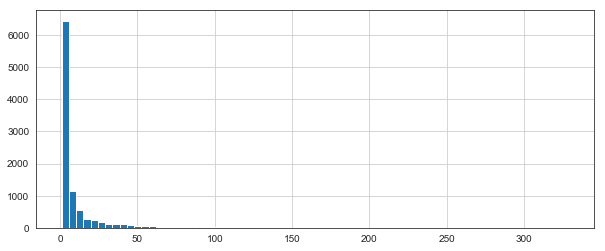

In [93]:
# plot histograms for num of ratings
plt.figure(figsize=(10,4))
ratings_title['num of ratings'].hist(bins=70)


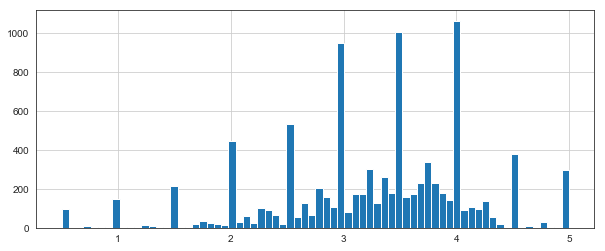

In [94]:
#plot histogram with respect to ratings
plt.figure(figsize=(10,4))
ratings_title['rating'].hist(bins=70)

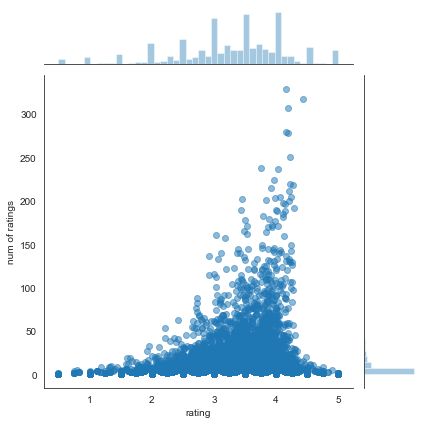

In [99]:
#lets draw jointplot
#jointplot helps to give the commibation of both scattered plot and information of histogram
sns.jointplot(x='rating',y='num of ratings',data=ratings_title,alpha=0.5)
#points are dense means most number of ratings are given

In [ ]:
#upto here we all have a general idea of what the data looks like
#Now we wll simple Reccommendention system using our data

In [105]:
#lets create  pivot_table it's used whether user is given rating or not,if not given it shows NaN.
#Reason behind creating pivot_table EX:suppose we have watched one movie, which is the next movie i will be recommended based on the ratings give by userId.
moviemat=df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#Now we can see which moovie got highest rating by more number of users
ratings_title.sort_values('num of ratings',ascending=False).head(22)


,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [123]:
#Now let's see the correlated movie for Toy Story
#grab the user the ratings for Toy Story from pivot_table
ToyStory_ratings = moviemat['Toy Story (1995)']
ToyStory_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

In [124]:
#we use corrwith() to get correlation b/w two movies from pivot_table
similar_to_ToyStory=moviemat.corrwith(ToyStory_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [127]:
#Shows Correlation movies of ToyStory from pivot_table
corr_ToyStory =pd.DataFrame(similar_to_ToyStory,columns=['correlation'])
corr_ToyStory.dropna(inplace=True)#droping NaN
corr_ToyStory.head()
#higher the correlation value more correlated to Toy Story movie
#Max correlation value be 1

,correlation
title,
"'burbs, The (1989)",0.240563
(500) Days of Summer (2009),0.353833
*batteries not included (1987),-0.427425
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),-0.285732


In [130]:
#we will sort these movie rating are give by user once or twice 
corr_ToyStory.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0
Brigadoon (1954),1.0
Project X (1987),1.0
Imitation of Life (1959),1.0
Terminal Velocity (1994),1.0


In [139]:
#we will consider correlation of the if the number of ratings are >150,

corr_ToyStory=corr_ToyStory.join(ratings['num of ratings'])
corr_ToyStory.head()


,correlation,num of ratings
title,,
"'burbs, The (1989)",0.240563,17
(500) Days of Summer (2009),0.353833,42
*batteries not included (1987),-0.427425,7
10 Cent Pistol (2015),1.000000,2
10 Cloverfield Lane (2016),-0.285732,14


In [140]:
#Now sort the values and notice the how title make sense 
corr_ToyStory[corr_ToyStory['num of ratings']>150].sort_values('correlation',ascending=False).head()



,correlation,num of ratings
title,,
Toy Story (1995),1.000000,215
Aladdin (1992),0.611892,183
Memento (2000),0.378622,159
Back to the Future (1985),0.368229,171
Shrek (2001),0.363078,170
